# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## 1. Откроем файл с данными и изучим общую информацию. 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_columns = 30

try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

In [5]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,False,False,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,False,False,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,False,False,NaN,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

<Axes: >

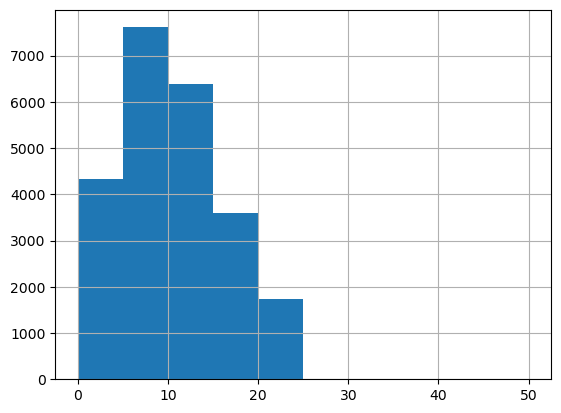

In [9]:
data['total_images'].hist(bins = 10 , grid = True)

<Axes: >

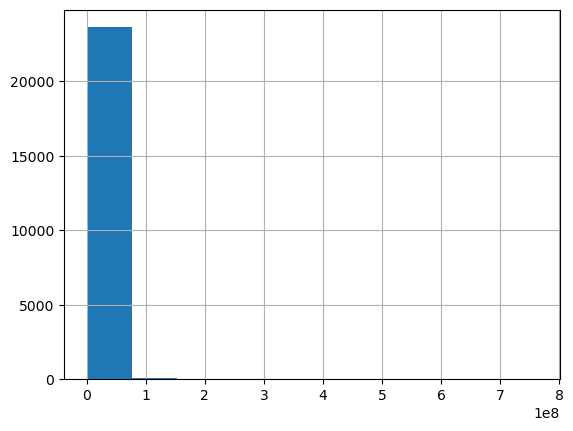

In [10]:
data['last_price'].hist(bins = 10 , grid = True)

<Axes: >

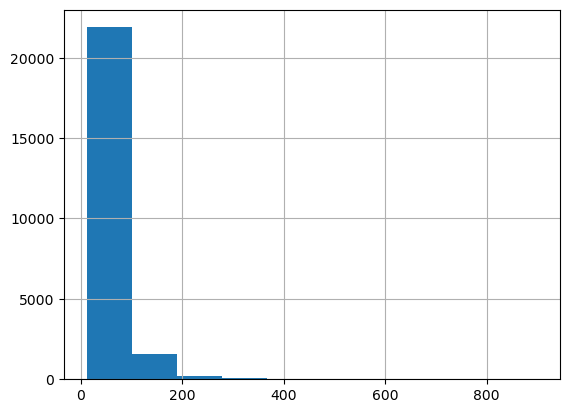

In [11]:
data['total_area'].hist(bins = 10 , grid = True)

<Axes: >

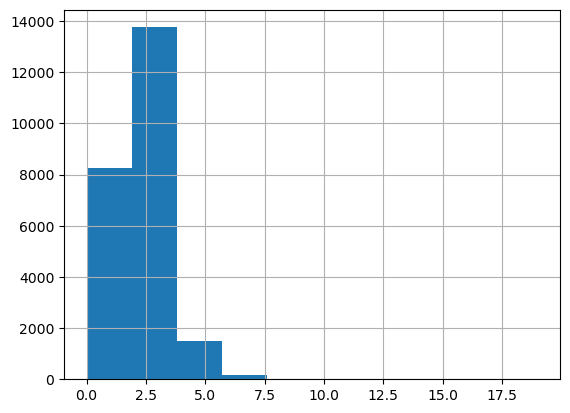

In [15]:
data['rooms'].hist(bins = 10 , grid = True)

<Axes: >

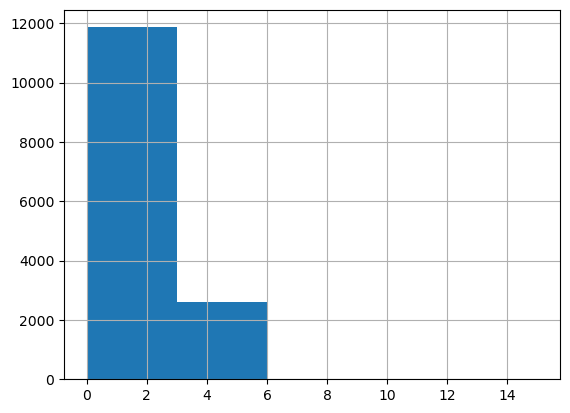

In [20]:
data['ceiling_height'].hist(bins = 5 , grid = True, range = (0,15))

<Axes: >

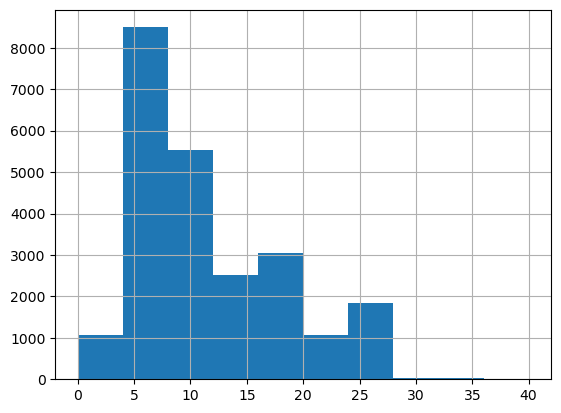

In [18]:
data['floors_total'].hist(bins = 10 , grid = True, range = (0, 40))

<Axes: >

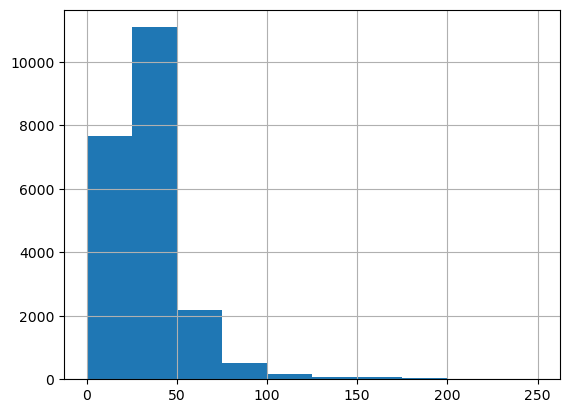

In [22]:
data['living_area'].hist(bins = 10 , grid = True, range = (0,250))

<Axes: >

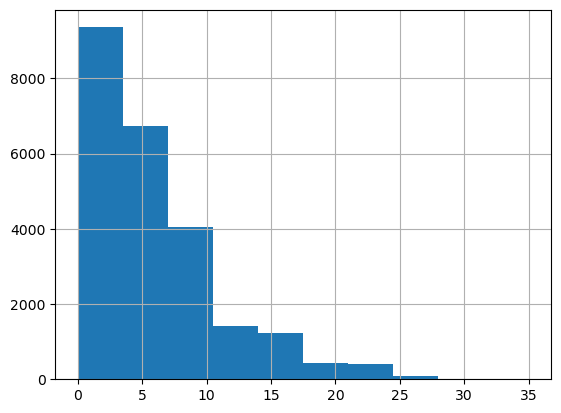

In [23]:
data['floor'].hist(bins = 10 , grid = True, range = (0, 35))

<Axes: >

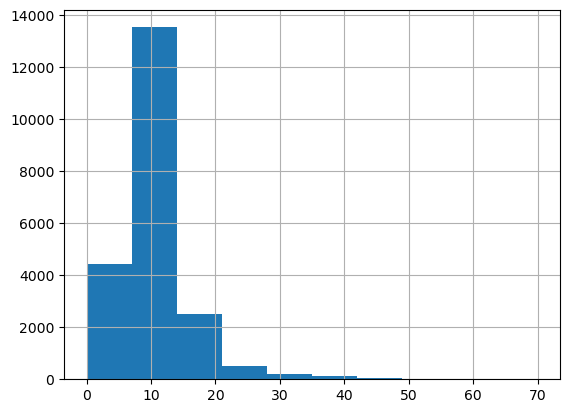

In [26]:
data['kitchen_area'].hist(bins = 10 , grid = True, range = (0,70))

<Axes: >

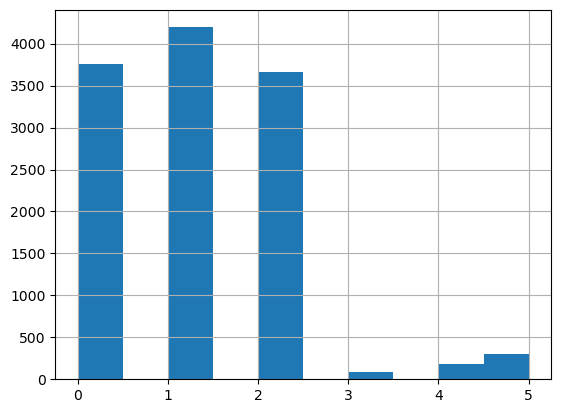

In [27]:
data['balcony'].hist(bins = 10 , grid = True)

<Axes: >

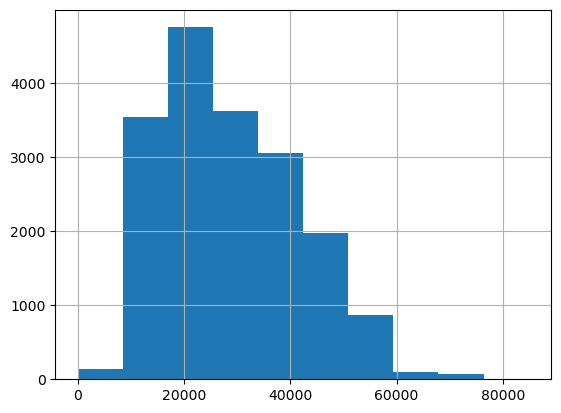

In [28]:
data['airports_nearest'].hist(bins = 10 , grid = True)

<Axes: >

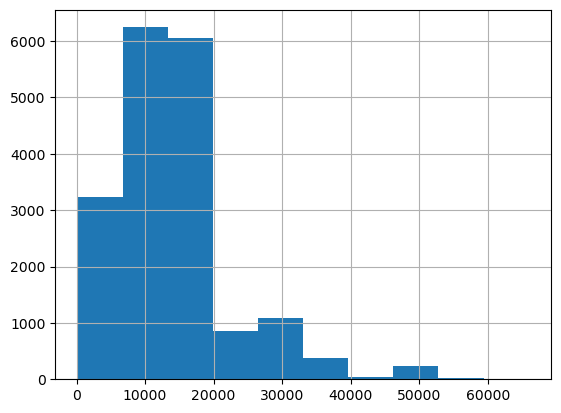

In [29]:
data['cityCenters_nearest'].hist(bins = 10 , grid = True)

<Axes: >

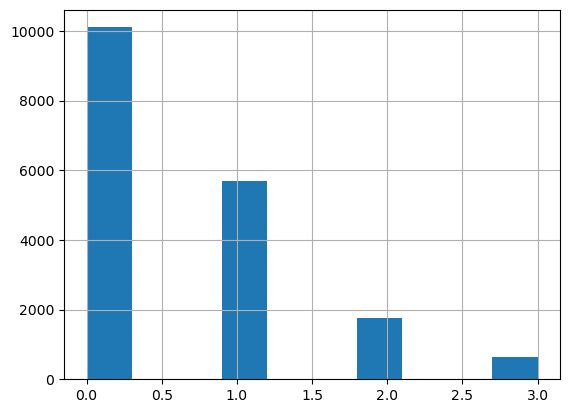

In [30]:
data['parks_around3000'].hist(bins = 10 , grid = True)

<Axes: >

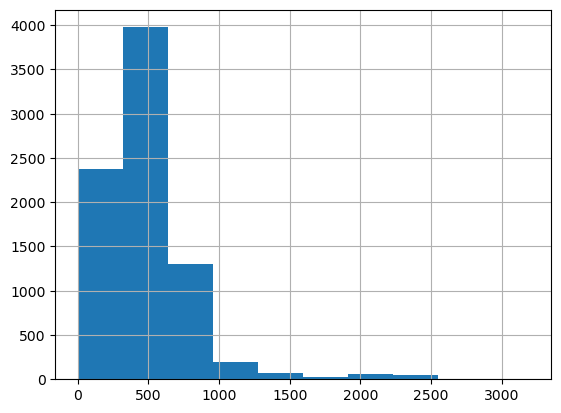

In [31]:
data['parks_nearest'].hist(bins = 10 , grid = True)

<Axes: >

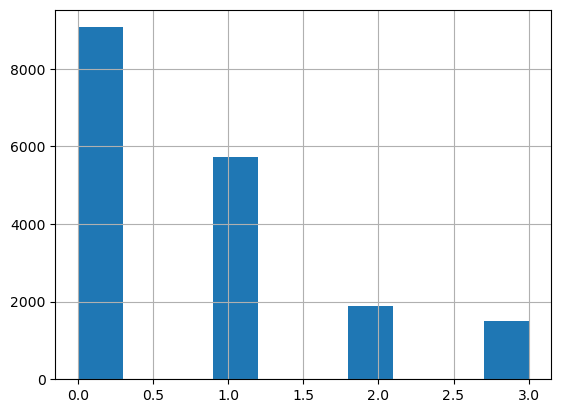

In [32]:
data['ponds_around3000'].hist(bins = 10 , grid = True)

<Axes: >

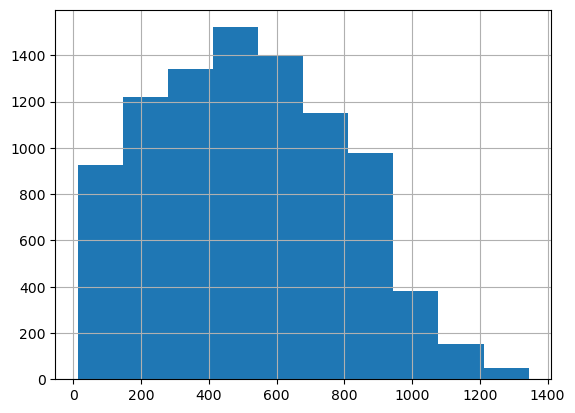

In [33]:
data['ponds_nearest'].hist(bins = 10 , grid = True)

<Axes: >

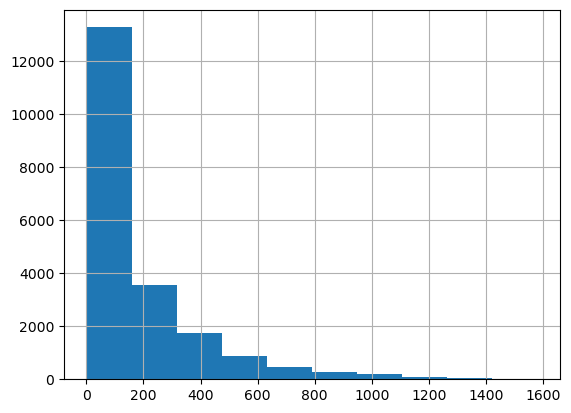

In [34]:
data['days_exposition'].hist(bins = 10 , grid = True)

In [35]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,"23,699.00","23,699.00","23,699.00","23,699.00","14,504.00","23,613.00","21,796.00","23,699.00","21,421.00","12,180.00","18,157.00","18,180.00","18,181.00","8,079.00","18,181.00","9,110.00","20,518.00"
mean,9.86,"6,541,548.77",60.35,2.07,2.77,10.67,34.46,5.89,10.57,1.15,"28,793.67","14,191.28",0.61,490.80,0.77,517.98,180.89
std,5.68,"10,887,013.27",35.65,1.08,1.26,6.60,22.03,4.89,5.91,1.07,"12,630.88","8,608.39",0.80,342.32,0.94,277.72,219.73
min,0.00,"12,190.00",12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,"3,400,000.00",40.00,1.00,2.52,5.00,18.60,2.00,7.00,0.00,"18,585.00","9,238.00",0.00,288.00,0.00,294.00,45.00
50%,9.00,"4,650,000.00",52.00,2.00,2.65,9.00,30.00,4.00,9.10,1.00,"26,726.00","13,098.50",0.00,455.00,1.00,502.00,95.00
75%,14.00,"6,800,000.00",69.90,3.00,2.80,16.00,42.30,8.00,12.00,2.00,"37,273.00","16,293.00",1.00,612.00,1.00,729.00,232.00
max,50.00,"763,000,000.00",900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,"84,869.00","65,968.00",3.00,"3,190.00",3.00,"1,344.00","1,580.00"


Проверим число дубликатов в датафрейме

In [37]:
data.duplicated().sum()

0

### Вывод

**Просмотрели таблицу, типы данных столбцов. Заметили, что есть пропущенные данные и некорректный тип данных у некоторых столбцов. Также присутствуют аномальные значения.**

## 2. Предобработка данных

Посмотрим количество пропущенных значений в столбцах

In [38]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Рассмотрим столбцы и поменяем типы данных там, где это возможно**

`last_price` изменим на тип int, так будет удобнее смотреть стоимость

In [39]:
data['last_price'] = data['last_price'].astype(int)

In [40]:
data['last_price'].dtypes

dtype('int32')

Т.к. в `first_day_exposition` нет указания часов и минут, то поменяем на тип даты

In [41]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')

In [42]:
data['first_day_exposition'].head(10)

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
5   2018-09-10
6   2017-11-02
7   2019-04-18
8   2018-05-23
9   2017-02-26
Name: first_day_exposition, dtype: datetime64[ns]

В `is_apartment` указано, является ли объект апартаментами, или нет.

То есть значения могут принимать либо **True**, либо **False**. В выборке много пропусков, возможно это из-за того, что пользователи не указали соответствующие данные. Либо же функцию выбора апартаментов добавили недавно и она не применялась к старым объявлениям.

In [43]:
data['is_apartment'] = data['is_apartment'].fillna(value=False)

In [44]:
data['is_apartment'].isna().sum()

0

`balcony` отвечает за количество лоджий на объекте.

Опять же присутствуют пропущенные значения.

Проверим, какие значения может принимать данный столбец

In [45]:
data['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

На месте пропусков мы можем поставить 0, т.к. пользователи скорее всего пропустили шаг заполнения количества лоджий ввиду их отсутствия.

Также изменим тип данных на int, для удобства просмотра информации.

In [46]:
data['balcony'] = data['balcony'].fillna(value=0).astype(int)

In [47]:
data['balcony'].isna().sum()

0

In [48]:
data['balcony'].dtypes

dtype('int32')

`floors_total` - количество этажей в здании.

Можем спокойно удалить строчки, где параметр не указан, на результаты он не повлияет.

In [49]:
data.dropna(subset=['floors_total'], inplace=True)

In [50]:
data['floors_total'].isna().sum()

0

Тоже самое проделаем с столбцом `locality_name` (название населенного пункта)

Вообще, можно передать разработчикам, чтобы они сделали обязательным заполнение данного пункта.

In [51]:
data.dropna(subset=['locality_name'], inplace=True)

In [52]:
data['locality_name'].isna().sum()

0

Остались пропущенные значения в столбцах с высотой потолков, жилой площадью и площадью кухни.

Начнем с `kitchen_area` (площади кухни)

Заменим пустые значения на отношение средней площади кухни к средней площади объекта.

In [53]:
kitchen = data['kitchen_area'].mean() / data['total_area'].mean()

data['kitchen_area'].fillna(kitchen * data['total_area'], inplace=True)

In [54]:
data['kitchen_area'].isna().sum()

0

Сделаем тоже самое с `living_area` (жилой площадью)

In [55]:
living = data['living_area'].mean() / data['total_area'].mean()

data['living_area'].fillna(living * data['total_area'], inplace=True)

In [56]:
data['living_area'].isna().sum()

0

`ceiling_height` - высота потолков. Заполним пропуски медианным значением по выборке.

In [57]:
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)

In [58]:
data['ceiling_height'].isna().sum()

0

`days_exposition` - длительность размещения объявления

Заменим пропуски на медианные значения

In [59]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,"23,565.00","23,565.00","23,565.00","23,565.00","23,565.00","23,565.00","23,565.00","23,565.00","23,565.00","23,565.00","18,041.00","18,064.00","18,065.00","8,030.00","18,065.00","9,036.00","20,394.00"
mean,9.88,"6,540,058.26",60.32,2.07,2.72,10.68,34.59,5.88,10.50,0.59,"28,797.08","14,192.66",0.61,490.58,0.77,518.29,180.74
std,5.68,"10,910,934.72",35.66,1.08,0.99,6.59,22.37,4.87,6.04,0.96,"12,632.50","8,613.35",0.80,341.57,0.94,278.01,219.73
min,0.00,"12,190.00",12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,"3,400,000.00",40.00,1.00,2.60,5.00,19.00,2.00,7.00,0.00,"18,565.00","9,238.00",0.00,288.00,0.00,293.00,45.00
50%,9.00,"4,646,000.00",52.00,2.00,2.65,9.00,30.00,4.00,9.00,0.00,"26,757.00","13,096.50",0.00,455.00,1.00,503.00,95.00
75%,14.00,"6,790,000.00",69.70,3.00,2.70,16.00,42.10,8.00,12.00,1.00,"37,273.00","16,285.00",1.00,612.00,1.00,730.00,231.00
max,50.00,"763,000,000.00",900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,"84,869.00","65,968.00",3.00,"3,190.00",3.00,"1,344.00","1,580.00"


In [60]:
data.loc[data['days_exposition'].isna(), 'days_exposition'] = data['days_exposition'].median()

`airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`. 
Эти данные заполнялись автоматически программой, так что нельзя сразу сказать, почему образовались пропуски. Возможно, по близости нет аэропортов и т.д., либо же программа дала сбой.

Касательно `cityCenters_nearest`

Оставим пропуски, т.к. в выборке есть населенные пункты, и если заполнить пропуски медианным или средним значением, то расстояние до центра города окажется больше, чем диаметр населенного пункта.

### Вывод

**Обработали пропущенные значения там, где это возможно, заменили типы данных.**

## 3. Посчитаем и добавим в таблицу новые столбцы

**Цена квадратного метра**

In [62]:
data['price_meter'] = round(data['last_price'] / data['total_area'])

In [63]:
data['price_meter'].head(10)

0   120,370.00
1    82,921.00
2    92,786.00
3   408,176.00
4   100,000.00
5    95,066.00
6    99,196.00
7   110,545.00
8    87,455.00
9    88,525.00
Name: price_meter, dtype: float64

**День недели**

In [64]:
data['day_publ'] = data['first_day_exposition'].dt.weekday

In [65]:
data['day_publ'].head(10)

0    3
1    1
2    3
3    4
4    1
5    0
6    3
7    3
8    2
9    6
Name: day_publ, dtype: int64

**Месяц**

In [66]:
data['month_publ'] = data['first_day_exposition'].dt.month

In [67]:
data['month_publ'].head(10)

0     3
1    12
2     8
3     7
4     6
5     9
6    11
7     4
8     5
9     2
Name: month_publ, dtype: int64

**Год**

In [68]:
data['year_publ'] = data['first_day_exposition'].dt.year

In [69]:
data['year_publ'].head(10)

0    2019
1    2018
2    2015
3    2015
4    2018
5    2018
6    2017
7    2019
8    2018
9    2017
Name: year_publ, dtype: int64

**Тип этажа квартиры**

Создадим функцию, для подразделения этажей квартиры на **первый**, **последний**, **другой**

In [73]:
def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [74]:
data['floor_category'] = data.apply(floor_type, axis=1)

In [75]:
data['floor_category'].head(10)

0    другой
1    первый
2    другой
3    другой
4    другой
5    другой
6    другой
7    другой
8    другой
9    другой
Name: floor_category, dtype: object

**Расстояние в км до центра города**

In [76]:
data['distance_to_centr'] = round(data['cityCenters_nearest'] / 1000)

In [77]:
data['distance_to_centr'].head(10)

0   16.00
1   19.00
2   14.00
3    7.00
4    8.00
5     NaN
6   19.00
7   12.00
8     NaN
9   15.00
Name: distance_to_centr, dtype: float64

### Вывод

**Добавили дополнительные столбцы с днем, месяцем и годом публикации, а также с расстоянием в км до центра города.**

## 4. Проведем исследовательский анализ данных

**Общая площадь**

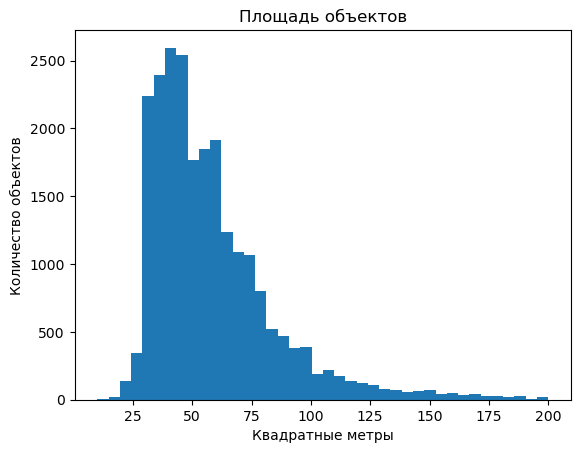

In [79]:
plt.hist(data['total_area'], bins=40, range=(10,200))
plt.title('Площадь объектов')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество объектов')
plt.show()

Наименьшие по площади объекты

In [81]:
data['total_area'].sort_values().head(15)

19904   12.00
17961   13.00
19546   13.00
19807   13.00
19558   13.20
19642   14.00
12040   15.00
16949   15.00
8886    15.50
9412    16.00
10208   17.00
716     17.00
22356   17.20
9157    17.60
21802   17.78
Name: total_area, dtype: float64

Наибольшие по площади объекты

In [83]:
data['total_area'].sort_values(ascending=False).head(15)

19540   900.00
12859   631.20
3117    631.00
15651   618.00
5358    590.00
4237    517.00
8018    507.00
15016   500.00
5893    500.00
12401   495.00
9826    494.10
22494   491.00
6621    488.00
660     483.90
6221    470.30
Name: total_area, dtype: float64

Средняя площадь объектов

In [84]:
round(data['total_area'].mean())

60

**Жилая площадь**

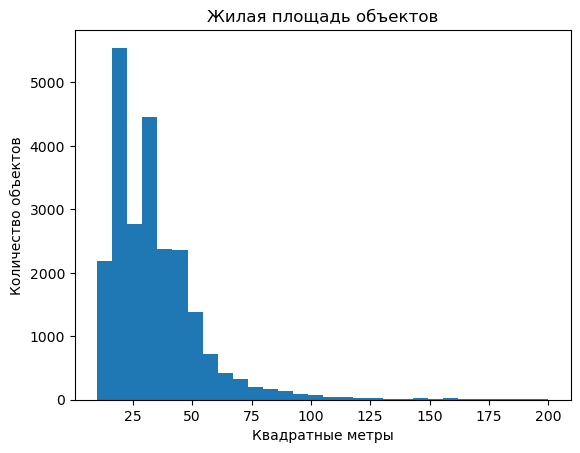

In [85]:
plt.hist(data['living_area'], bins=30, range=(10,200))
plt.title('Жилая площадь объектов')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество объектов')
plt.show()

Наименьшая жилая площадь объектов

In [86]:
data['living_area'].sort_values().head(15)

13915   2.00
21758   2.00
23574   3.00
3242    3.00
17582   5.00
21943   5.40
16431   6.00
19251   6.50
19546   7.43
17961   7.43
19558   7.54
20994   8.00
23208   8.00
114     8.30
2309    8.40
Name: living_area, dtype: float64

Наибольшая жилая площадь объектов

In [87]:
data['living_area'].sort_values(ascending=False).head(15)

19540   409.70
5358    409.00
3117    360.41
12401   347.50
4237    332.00
12859   322.30
660     312.50
8018    301.50
14088   300.00
5893    285.59
15016   285.59
9826    282.22
20273   279.60
22494   274.00
14498   264.50
Name: living_area, dtype: float64

Средняя жилая площадь объектов

In [88]:
round(data['living_area'].mean())

35

**Площадь кухни**

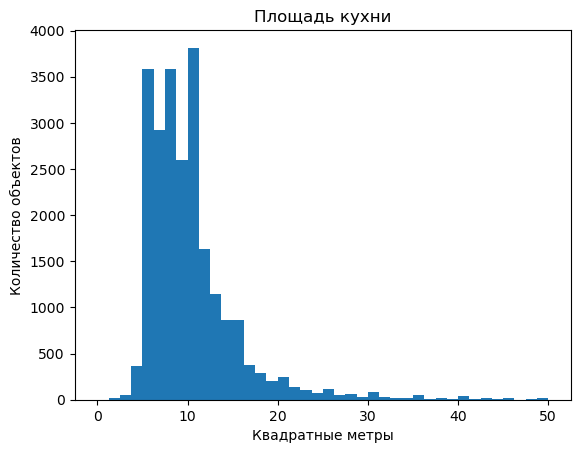

In [89]:
plt.hist(data['kitchen_area'], bins=40, range=(0,50))
plt.title('Площадь кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество объектов')
plt.show()

Наименьшая площадь кухни

In [90]:
data['kitchen_area'].sort_values().head(15)

20217   1.30
9138    2.00
16367   2.00
21419   2.00
11033   2.00
906     2.00
19642   2.00
6262    2.00
19904   2.10
19807   2.28
19546   2.28
17961   2.28
17834   2.30
19558   2.31
8729    2.40
Name: kitchen_area, dtype: float64

Наибольшая площадь кухни

In [91]:
data['kitchen_area'].sort_values(ascending=False).head(15)

19540   112.00
20215   107.00
2489    100.70
5358    100.00
16239    93.20
16797    93.00
15016    87.54
10867    87.20
9826     86.50
492      77.00
4394     77.00
14644    75.00
22131    73.92
16647    72.00
12971    70.03
Name: kitchen_area, dtype: float64

Средняя площадь кухни

In [92]:
round(data['kitchen_area'].mean())

10

**Цена объекта**

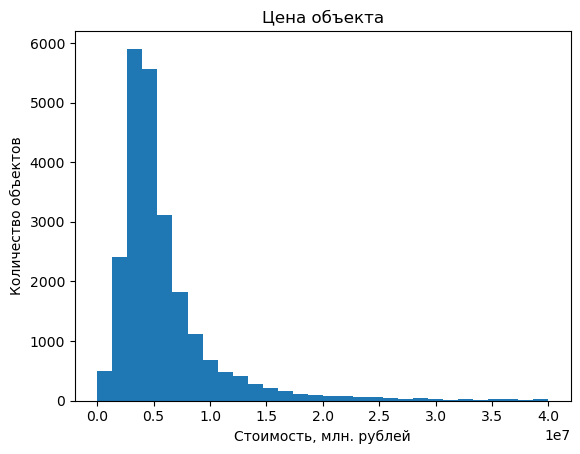

In [93]:
plt.hist(data['last_price'], bins=30, range=(0,40000000))
plt.title('Цена объекта')
plt.xlabel('Стоимость, млн. рублей')
plt.ylabel('Количество объектов')
plt.show()

Наименьшая цена объектов

In [94]:
data['last_price'].sort_values().head(15)

8793      12190
17456    430000
14911    430000
16274    440000
9581     450000
17676    450000
16219    450000
5698     450000
18867    470000
23484    470000
21912    470000
16032    480000
10782    490000
6859     490000
2097     500000
Name: last_price, dtype: int32

Наибольшая цена объектов

In [95]:
data['last_price'].sort_values(ascending=False).head(15)

12971    763000000
19540    420000000
14706    401300000
1436     330000000
15651    300000000
22831    289238400
16461    245000000
13749    240000000
5893     230000000
8900     190870000
19865    180000000
19155    160000000
2536     159984000
16495    159000000
1026     155000000
Name: last_price, dtype: int32

Средняя цена объектов

In [96]:
round(data['last_price'].mean(), 1)

6540058.3

**Количество комнат**

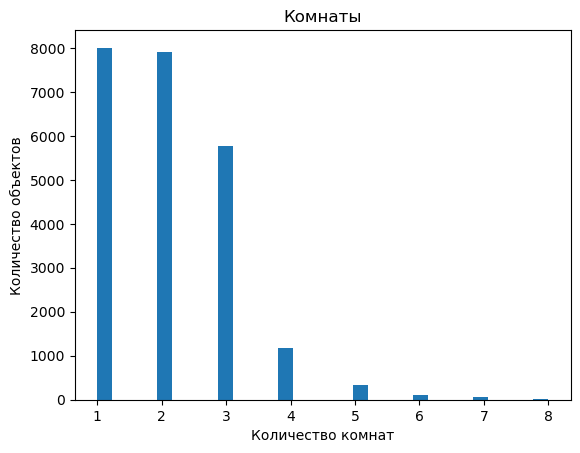

In [97]:
plt.hist(data['rooms'], bins=30, range=(1,8))
plt.title('Комнаты')
plt.xlabel('Количество комнат')
plt.ylabel('Количество объектов')
plt.show()

Наибольшее число комнат у объектов

In [98]:
data['rooms'].sort_values(ascending=False).head(15)

14498    19
18848    16
5358     15
20829    14
866      14
19540    12
648      11
9688     11
18891    10
18119    10
4149     10
15151     9
8860      9
8822      9
13397     9
Name: rooms, dtype: int64

Среднее число комнат у объектов

In [99]:
round(data['rooms'].mean())

2

**Высота потолков**

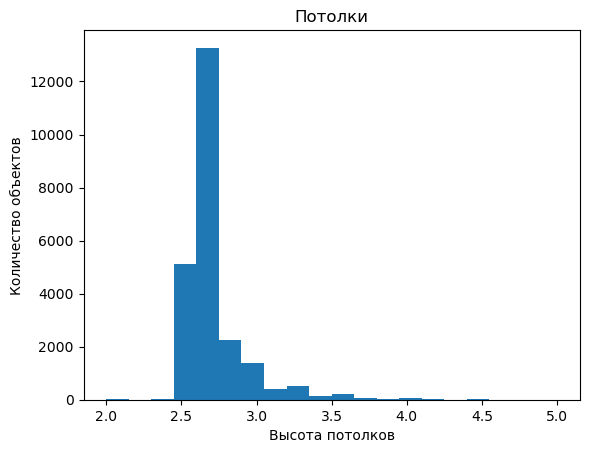

In [100]:
plt.hist(data['ceiling_height'], bins=20, range=(2,5))
plt.title('Потолки')
plt.xlabel('Высота потолков')
plt.ylabel('Количество объектов')
plt.show()

Наибольшая высота потолков на объектах

In [101]:
data['ceiling_height'].sort_values(ascending=False).head(15)

22869   100.00
3148     32.00
22336    32.00
21377    27.50
5807     27.00
5246     27.00
10773    27.00
17857    27.00
21824    27.00
20478    27.00
22938    27.00
4876     27.00
5669     26.00
11285    25.00
18545    25.00
Name: ceiling_height, dtype: float64

Наименьшая высота потолков на объектах

In [102]:
data['ceiling_height'].sort_values().head(15)

22590   1.00
5712    1.20
16934   1.75
20520   2.00
16884   2.00
11352   2.00
22960   2.00
2572    2.00
5850    2.00
19329   2.00
552     2.00
4212    2.00
16446   2.00
19098   2.00
12755   2.20
Name: ceiling_height, dtype: float64

**Этаж квартиры**

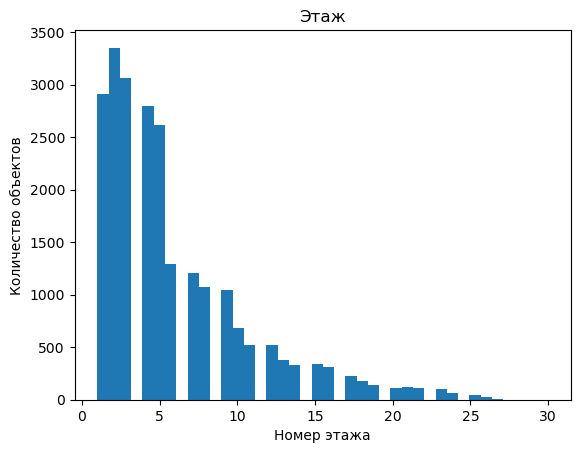

In [103]:
plt.hist(data['floor'], bins=40, range=(1,30))
plt.title('Этаж')
plt.xlabel('Номер этажа')
plt.ylabel('Количество объектов')
plt.show()

**Oбщее количество этажей в доме**

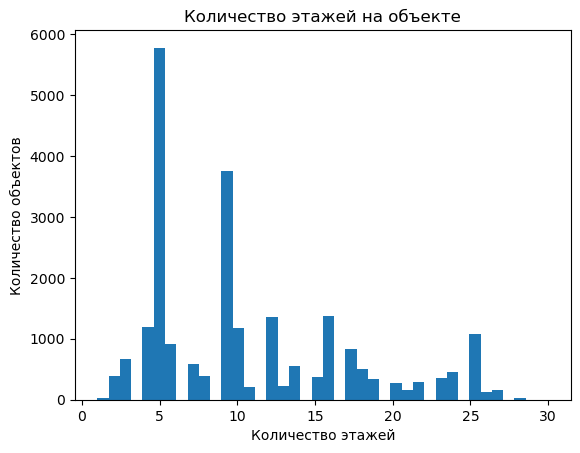

In [104]:
plt.hist(data['floors_total'], bins=40, range=(1,30))
plt.title('Количество этажей на объекте')
plt.xlabel('Количество этажей')
plt.ylabel('Количество объектов')
plt.show()

**Расстояние до центра города в метрах**

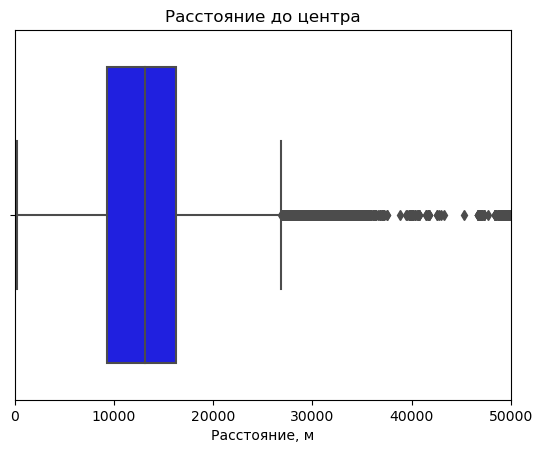

In [105]:
sns.boxplot(x=data['cityCenters_nearest'], color='blue')
plt.title('Расстояние до центра')
plt.xlabel('Расстояние, м')
_ = plt.xlim(0, 50000)

In [106]:
data['cityCenters_nearest'].describe()

count   18,064.00
mean    14,192.66
std      8,613.35
min        181.00
25%      9,238.00
50%     13,096.50
75%     16,285.00
max     65,968.00
Name: cityCenters_nearest, dtype: float64

**Расстояние до ближайшего аэропорта**

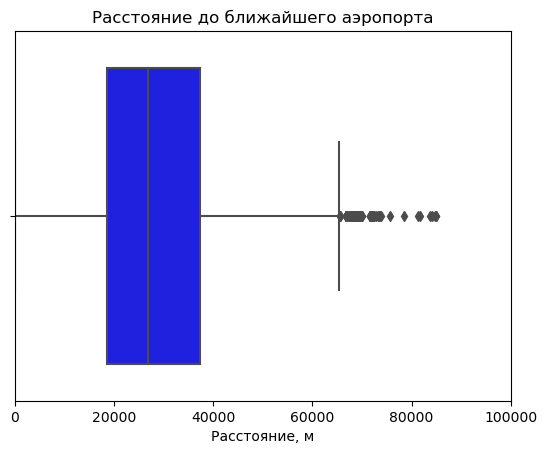

In [107]:
sns.boxplot(x=data['airports_nearest'], color='blue')
plt.title('Расстояние до ближайшего аэропорта')
plt.xlabel('Расстояние, м')
_ = plt.xlim(0, 100000)

In [108]:
data['airports_nearest'].describe()

count   18,041.00
mean    28,797.08
std     12,632.50
min          0.00
25%     18,565.00
50%     26,757.00
75%     37,273.00
max     84,869.00
Name: airports_nearest, dtype: float64

**Расстояние до ближайшего парка**

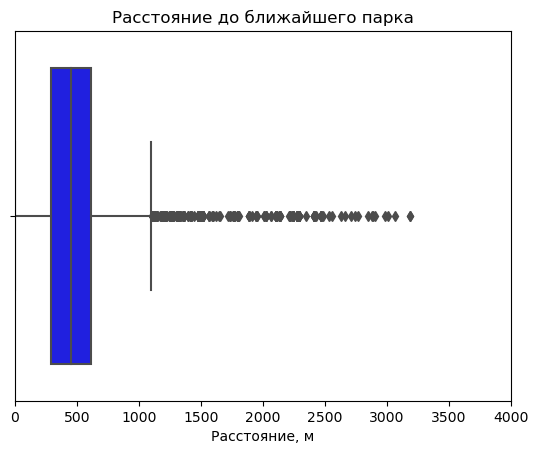

In [109]:
sns.boxplot(x=data['parks_nearest'] , color='blue')
plt.title('Расстояние до ближайшего парка')
plt.xlabel('Расстояние, м')
_ = plt.xlim(0, 4000)

In [110]:
data['parks_nearest'].describe()

count   8,030.00
mean      490.58
std       341.57
min         1.00
25%       288.00
50%       455.00
75%       612.00
max     3,190.00
Name: parks_nearest, dtype: float64

**День публикации**

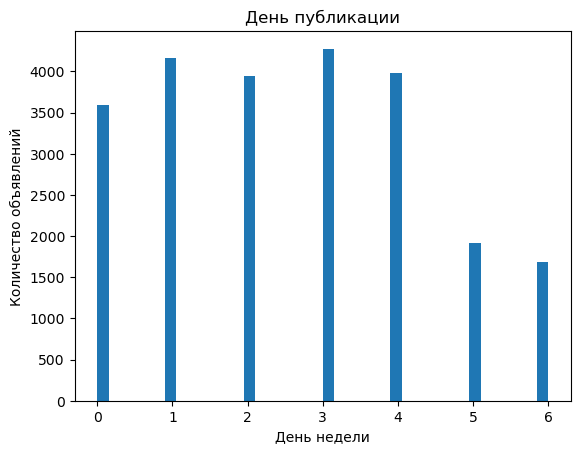

In [111]:
plt.hist(data['day_publ'], bins=40, range=(0,6))
plt.title('День публикации')
plt.xlabel('День недели')
plt.ylabel('Количество объявлений')
plt.show()

In [112]:
data['day_publ'].describe()

count   23,565.00
mean         2.57
std          1.79
min          0.00
25%          1.00
50%          3.00
75%          4.00
max          6.00
Name: day_publ, dtype: float64

**Месяц публикации**

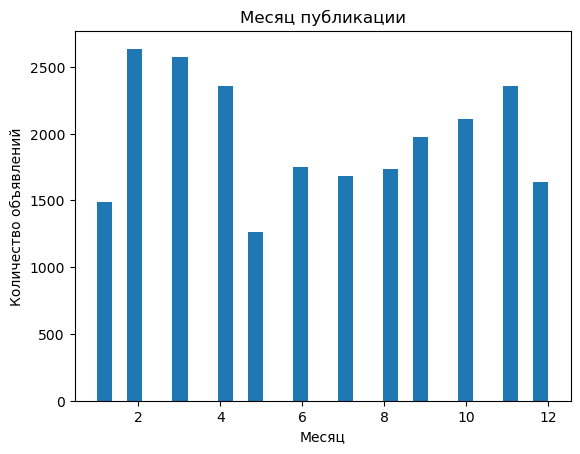

In [113]:
plt.hist(data['month_publ'], bins=30, range=(1,12))
plt.title('Месяц публикации')
plt.xlabel('Месяц')
plt.ylabel('Количество объявлений')
plt.show()

In [114]:
data['month_publ'].describe()

count   23,565.00
mean         6.40
std          3.49
min          1.00
25%          3.00
50%          6.00
75%         10.00
max         12.00
Name: month_publ, dtype: float64

### Вывод

**Общая площадь**
Подавляющее большинство объектов - от 35 до 75 квадратных метров. После 75 количество объявлений резко снижается.

**Жилая площадь**
Больше всего объявлений (около 5,5 тысяч) с 15 квадратных метров, следом по количеству объявлений идет 35 метров кваратных. Есть также объявления с больше, чем 125 квадратными метрами, которые выглядят крайне странно. Вероятно, два пика вызвано с количеством комнат на объекте (сначала идут жилые площади для однокомнатной, потом для двухкомнатки и минимальный пик для трехкомнатки. 

**Площадь кухни**
Укладывается от 5 до 15 квадратных метров. Больше 30 метров квадратных почти нет, и выглядят крайне странно. 

**Цена объекта**
Большинство - от 4 до 7 миллионов. Есть и единицы объявлений среди стоимости в 20 и 25 миллионов.

**Количество комнат**
Однокомнатки лидируют среди всех объявлений (около 8 тысяч объявлений), двухкомнатки немного уступают (около 7,8 - 7,9 тысяч объявлений), далее следуют трехкомнатки (5,9 тысяч объявлений). Дальше количество объявлений резко падает. Соответственно у четырехкомнаток 1500 объявлений, у пятикомнаток примерно 250. Объявления с 5,6, 7 комнатами выглядят крайне странно, можно сделать вывод, что объект является либо частным домом, либо объединением квартир.

**Высота потолков**
Большинство вариантов имеют высоту потолков от 2,5 до 3 метров. Больше 3.5 метров высота потолков выглядит подозрительно. 

**Этаж квартиры**
Больше всего объявлений до 5 этажа. Есть также мизерное количество объявлений с выше, чем 25 этаж.

**Общее количество этажей в доме**
Пик приходится на пятиэтажки и десятиэтажки, дальше резко снижается и есть два пика на 16 этажках и 25 эиажках. Соответственно можно сделать вывод, что пятиэтажки и десятиэтажки - это старые дома, построенные еще в советское время.

**Растояние до центра города в метрах**
Медиана находится в пределах от 10 до 15 тысяч метров.

**Расстояние до ближайшего аэропорта**
Медиана находится в пределах от 20 до 35 тысяч метров.

**Расстояние до ближайшего парка**
Медиана в пределах 250 - 500 метров.

**День публикации**
Можем сделать вывод, что больше всего публикаций выходит в будние дни, в выходные количество объявлений резко снижается.

**Месяц публикации**
Здесь можно выделить пониженное количество предложений в январе, и мае, возможно это связано с праздниками.

### Изучить, как быстро продавались объекты

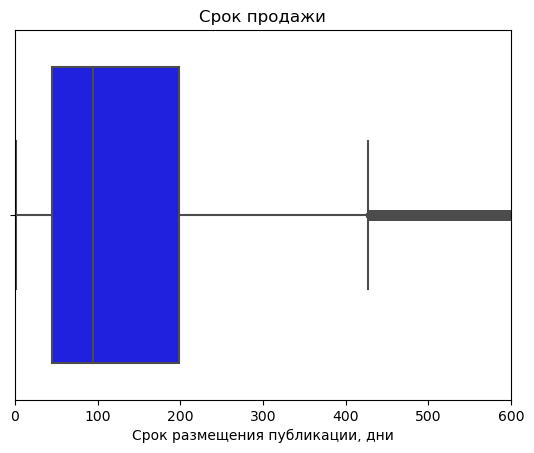

In [115]:
sns.boxplot(x=data['days_exposition'], color='blue')
plt.title('Срок продажи')
plt.xlabel('Срок размещения публикации, дни')
_ = plt.xlim(0, 600)

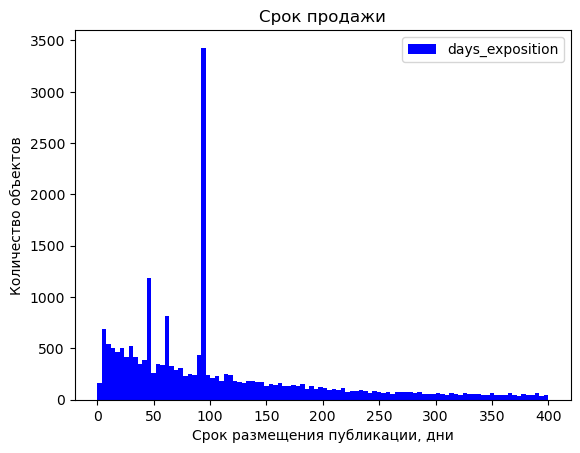

In [116]:
data.plot(y='days_exposition', 
          kind='hist', 
          color='blue', 
          range=(0,400), 
          bins=100)
plt.title('Срок продажи')
plt.xlabel('Срок размещения публикации, дни')
_ = plt.ylabel('Количество объектов')

In [117]:
data['days_exposition'].describe()

count   23,565.00
mean       169.20
std        206.50
min          1.00
25%         45.00
50%         95.00
75%        198.00
max      1,580.00
Name: days_exposition, dtype: float64

Среднее

In [ ]:
round(data['days_exposition'].mean())

Медиана

In [118]:
round(data['days_exposition'].median())

95

Создадим переменную, которая отвечает за быструю продажу объектов

In [121]:
fast_sale = data['days_exposition'].sort_values()

In [122]:
fast_sale.head(15)

1632    1.00
16053   2.00
13061   2.00
16212   2.00
23394   3.00
2769    3.00
8832    3.00
1416    3.00
14807   3.00
23371   3.00
294     3.00
22269   3.00
2835    3.00
12461   3.00
19917   3.00
Name: days_exposition, dtype: float64

Создадим переменную, которая отвечает за долгую продажу объектов

In [123]:
slow_sale = data['days_exposition'].sort_values(ascending=False)

In [124]:
slow_sale.head(15)

18843   1,580.00
1109    1,572.00
9553    1,553.00
1885    1,513.00
20969   1,512.00
6691    1,512.00
14093   1,497.00
15313   1,489.00
19123   1,485.00
11955   1,484.00
4736    1,477.00
2941    1,458.00
6006    1,452.00
521     1,441.00
9555    1,434.00
Name: days_exposition, dtype: float64

### Вывод

Обычно продажа занимает 80-100 дней. Большое число квартир, проданных за несколько дней после подачи объявления. А также есть варианты, которые продавались несколько десятков месяцев.

Быстрой продажей можно назвать срок в 50 дней и меньше. Долгой продажей 200 дней и дольше.

**Обработаем редкие и выбивающиеся значения**

Функция для подсчёта границ с учетом 1.5 размаха

In [125]:
def quartile_range(data, column):
    quart1 = data[column].quantile(0.25)
    quart3 = data[column].quantile(0.75)
    iqr = quart3 - quart1
    good_data = data.loc[(data[column] < quart3 + 1.5*iqr) & (data[column] > quart1 - 1.5*iqr), column]
    return good_data

Обработка столбцов с выбросами

In [126]:
list_features = ['last_price', 'total_area', 'kitchen_area', 'living_area', 'days_exposition', 'ceiling_height', 'rooms']
for col in list_features:
    data[col] = quartile_range(data, col)

In [127]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_meter,day_publ,month_publ,year_publ,distance_to_centr
count,"23,565.00","21,519.00","22,326.00","23,371.00","20,601.00","23,565.00","22,682.00","23,565.00","22,250.00","23,565.00","18,041.00","18,064.00","18,065.00","8,030.00","18,065.00","9,036.00","21,228.00","23,565.00","23,565.00","23,565.00","23,565.00","18,064.00"
mean,9.88,"4,837,114.55",54.32,2.03,2.63,10.68,31.53,5.88,9.42,0.59,"28,797.08","14,192.66",0.61,490.58,0.77,518.29,112.79,"99,405.84",2.57,6.40,"2,017.37",14.19
std,5.68,"2,215,773.61",19.33,0.97,0.08,6.59,13.75,4.87,3.18,0.96,"12,632.50","8,613.35",0.80,341.57,0.94,278.01,96.37,"50,389.43",1.79,3.49,1.04,8.62
min,0.00,"12,190.00",12.00,0.00,2.46,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00,112.00,0.00,1.00,"2,014.00",0.00
25%,6.00,"3,300,000.00",39.40,1.00,2.60,5.00,18.70,2.00,7.00,0.00,"18,565.00","9,238.00",0.00,288.00,0.00,293.00,45.00,"76,566.00",1.00,3.00,"2,017.00",9.00
50%,9.00,"4,400,000.00",50.00,2.00,2.65,9.00,30.00,4.00,9.00,0.00,"26,757.00","13,096.50",0.00,455.00,1.00,503.00,95.00,"95,000.00",3.00,6.00,"2,017.00",13.00
75%,14.00,"5,999,999.50",65.50,3.00,2.65,16.00,40.60,8.00,11.00,1.00,"37,273.00","16,285.00",1.00,612.00,1.00,730.00,146.00,"114,213.00",4.00,10.00,"2,018.00",16.00
max,50.00,"11,866,860.00",114.20,5.00,2.85,60.00,76.70,33.00,19.45,5.00,"84,869.00","65,968.00",3.00,"3,190.00",3.00,"1,344.00",427.00,"1,907,500.00",6.00,12.00,"2,019.00",66.00


### Вывод

Отбросили значения в таблице на основе 1.5 размаха.

### Определение факторов, влияющих на стоимость квартиры

**Зависимость цены от общей площади**

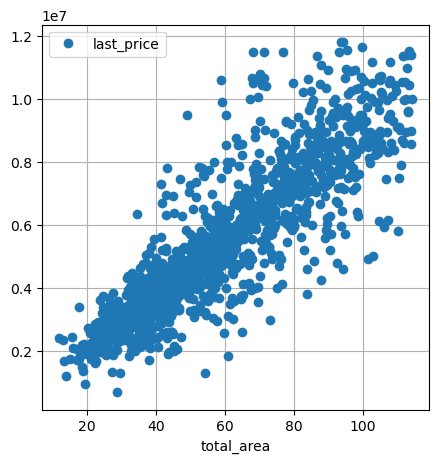

In [129]:
(
    data.pivot_table(index='total_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()

In [130]:
print('Корреляция цены и общей площади:','\n')
print(data.pivot_table(index='floor', values=['total_area', 'last_price']).corr(),'\n')

Корреляция цены и общей площади: 

            last_price  total_area
last_price        1.00        0.91
total_area        0.91        1.00 



**Зависимость цены от жилой площади**

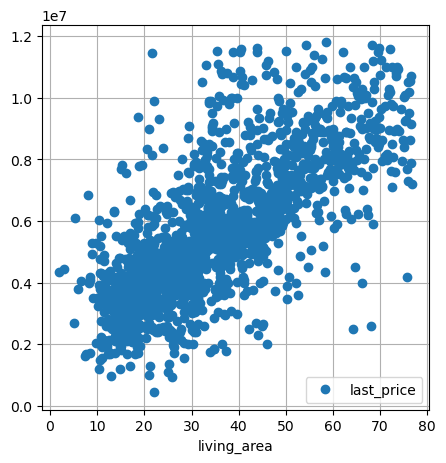

In [131]:
(
    data.pivot_table(index='living_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()

In [132]:
print('Корреляция цены и жилой площади:','\n')
print(data.pivot_table(index='floor', values=['living_area', 'last_price']).corr(),'\n')

Корреляция цены и жилой площади: 

             last_price  living_area
last_price         1.00         0.73
living_area        0.73         1.00 



**Зависимость от площади кухни**

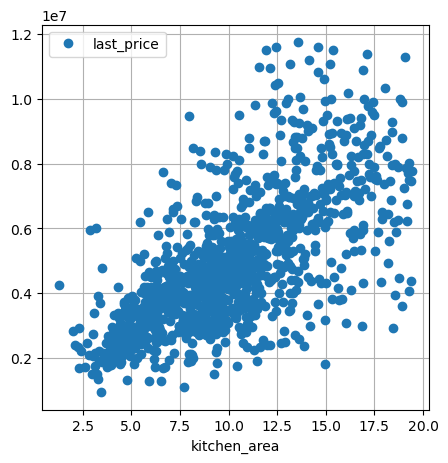

In [133]:
(
    data.pivot_table(index='kitchen_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()

In [134]:
print('Корреляция цены и площади кухни:','\n')
print(data.pivot_table(index='floor', values=['kitchen_area', 'last_price']).corr(),'\n')

Корреляция цены и площади кухни: 

              kitchen_area  last_price
kitchen_area          1.00        0.45
last_price            0.45        1.00 



**Зависимость цены от числа комнат**

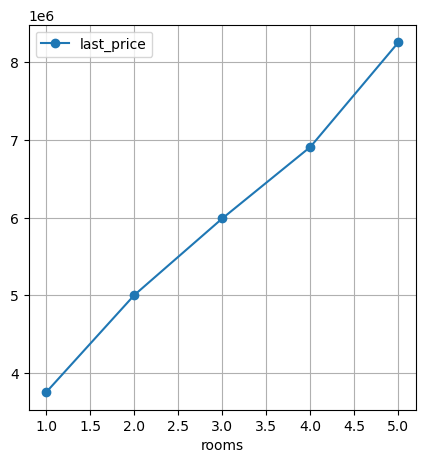

In [135]:
(
    data.query('rooms > 0').pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

In [136]:
print('Корреляция цены и числа комнат:','\n')
print(data.query('rooms > 0').pivot_table(index='floor', values=['rooms', 'last_price']).corr(),'\n')

Корреляция цены и числа комнат: 

            last_price  rooms
last_price        1.00   0.54
rooms             0.54   1.00 



**Зависимость цены от типа этажа**

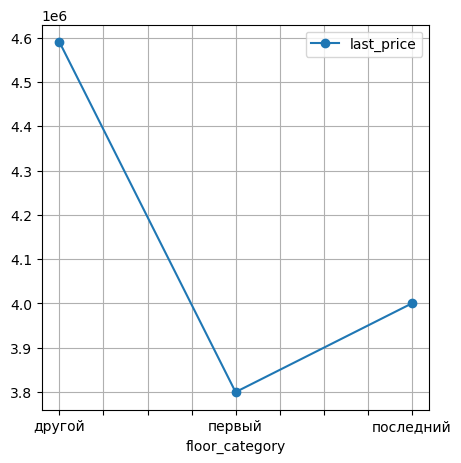

In [137]:
(
    data.pivot_table(index='floor_category', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

**Зависимость цены от даты размещения, день недели**

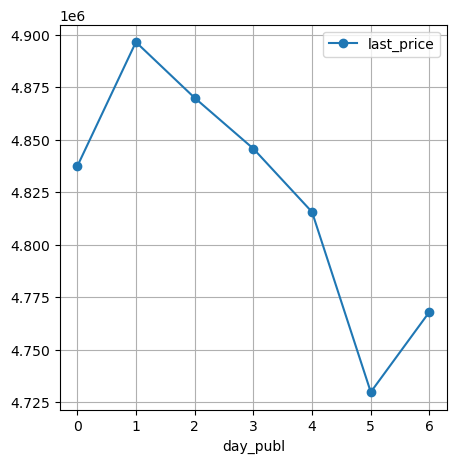

In [138]:
(
    data.pivot_table(index='day_publ', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

In [139]:
print('Корреляция цены и дня размещения:','\n')
print(data.pivot_table(index='floor', values=['day_publ', 'last_price']).corr(),'\n')

Корреляция цены и дня размещения: 

            day_publ  last_price
day_publ        1.00        0.67
last_price      0.67        1.00 



**Зависимость цены и месяца публикации**

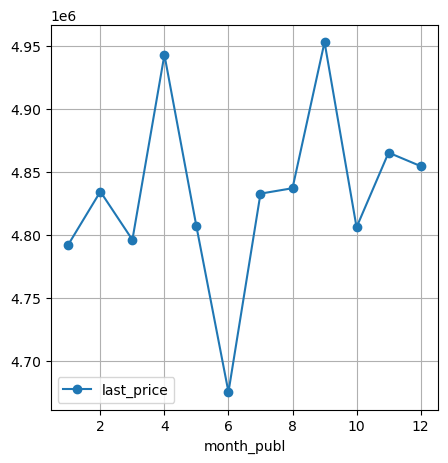

In [140]:
(
    data.pivot_table(index='month_publ', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

In [141]:
print('Корреляция цены и дня размещения:','\n')
print(data.pivot_table(index='floor', values=['month_publ', 'last_price']).corr(),'\n')

Корреляция цены и дня размещения: 

            last_price  month_publ
last_price        1.00        0.03
month_publ        0.03        1.00 



**Зависимость цены и года публикации**

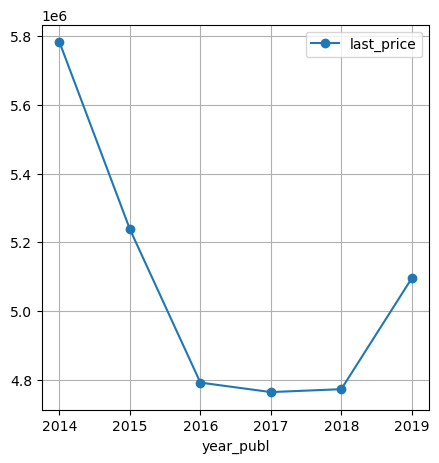

In [142]:
(
    data.pivot_table(index='year_publ', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

In [143]:
print('Корреляция цены и дня размещения:','\n')
print(data.pivot_table(index='floor', values=['year_publ', 'last_price']).corr(),'\n')

Корреляция цены и дня размещения: 

            last_price  year_publ
last_price        1.00       0.07
year_publ         0.07       1.00 



### Вывод

Цена больше всего коррелирует с **общей площадью** объекта. Соответственно, чем больше площадь, тем больше цена.

**Площадь кухни** и **Число комнат** также влияет на цену объекта, но зависимость ниже, чем у площади. 

Касательно **категории этажа**. Объекты, находящиеся на первом этаже стоят на порядок дешевле с аналогичными вариантами на других этажах. Немного дороже будет стоить квартира на последнем этаже. Можем сделать вывод, что наибольшая стоимость у объектов, находящихся не на первом этаже и не на последнем.

Удивительно, но цена зависит и от **дня размещения**. Во вторник выкладывают объявления с более высокой стоимостью, чем обычно. Наименьшая же цена в объявлениях, выложенных в субботу.

**Месяц размещения**. Объекты, выложенные в апреле и в сентябре стоят дороже. Самая низкая стоимость у объектов, выложенных в июне.

**Год размещения**. Здесь можно сделать вывод, что стоимость объектов стремительно падала с 2014 по 2016 годы, потом стоимость вышла на плато и продолжила расти, начиная с 2018 года.

## Посчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [144]:
city_ten = data['locality_name'].value_counts().head(10)
city_sm_price = data.query('locality_name in (@city_ten.index)').pivot_table(values='price_meter', index='locality_name')
city_sm_price = city_sm_price.astype(int)
city_sm_price.sort_values('price_meter', ascending=False)

,price_meter
locality_name,
Санкт-Петербург,114868
Пушкин,103125
деревня Кудрово,92473
посёлок Парголово,90175
посёлок Мурино,85673
посёлок Шушары,78551
Колпино,75424
Гатчина,68746
Всеволожск,68654


### Вывод

Наибольшая стоимость объектов в Санкт-Петербурге, что логично. 

Затем идёт Пушкин. Думаю, что это вызвано тем, что по близости много парков и прудов.
Затем идут районы, фактически являющиеся Санкт-Петербургом.  Наименьшая стоимость в Выборге, Гатчине и Всеволожске, из которых достаточно далеко ехать до Санкт-Петербурга.

## Вычислить среднюю цену каждого километра

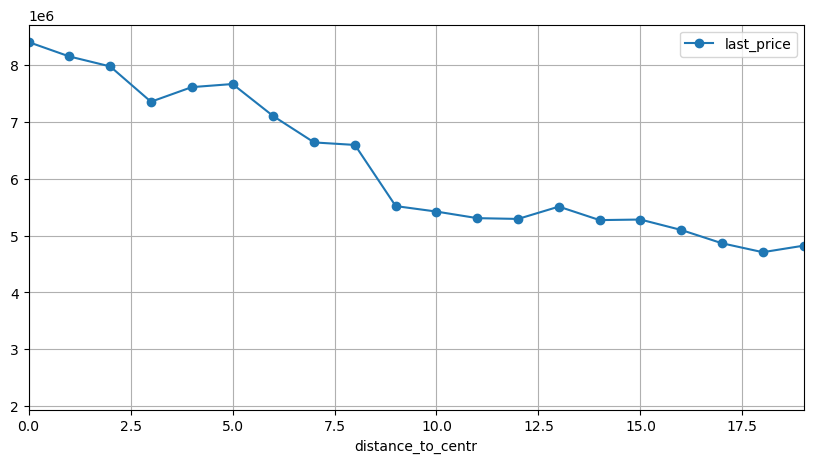

In [145]:
(
    data.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='distance_to_centr', values='last_price')
    .plot(grid=True, style='o-', xlim=(0,19), figsize=(10, 5))
)
plt.show()

### Вывод

Самая высокая стоимость у объектов, находящихся в пределах 6км от центра(цена начинается c 8.5 миллионов). Дальше - цена резко начинает падать. После 8км цена выходит на плато.

## 5. Общий вывод

**Обработали пропущенные значения там, где это возможно.** Оставили без изменений столбцы `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`. Т.к. данные заполнялись автоматически и природа образований пропусков неизвестна. Возможно, по близости нет таких объектов, или программа дала сбой. Следует сообщить об этом разработчикам. Касательно столбца is_apartment - скорее всего данная функция была введена недавно и поэтому большое количество пропусков в старых объявлениях - следует сделать этот пункт обязательным заполнением для всех.

**Добавили дополнительные столбцы с днем, месяцем и годом публикации, а также с расстоянием в км до центра города.**

**Провели исследовательский анализ данных**.

Так выглядит чаще всего встречающееся объявление: 
<ul>
 <li>Общая площадь от 35 до 60 квадратных метров</li>
 <li>Жилая площадь от 15 до 35 квадратных метров</li>
 <li>Площадь кухни от 5 до 15 квадртаных метров</li>
 <li>Цена от 4 до 7 миллионов</li>
 <li>Объект будет либо однокомнаткой, либо двухкомнаткой</li>
 <li>Высота потолков от 2.5 до 3 метров</li>
 <li>Этаж квартиры до 5</li>
</ul>


**Срок продажи квартиры**

Обычно продажа занимает 80-100 дней. Большое число квартир, проданных за несколько дней после подачи объявления. А также есть варианты, которые продавались несколько десятков месяцев.

Быстрой продажей можно назвать срок в 50 дней и меньше. Долгой продажей 200 дней и дольше.

**Факторы, влияющие на стоимость**

Цена больше всего коррелирует с общей площадью объекта. Соответственно, чем больше площадь, тем больше цена.
Жилая площадь тоже влияет, но все же меньше, чем общая площадь. Такая же история с площадью кухни. 
Касательно числа комнат - логично, что чем больше комнат на объекте, тем выше цена.

Объекты, находящиеся на первом этаже стоят на порядок дешевле с аналогичными вариантами на других этажах. Немного дороже будет стоить квартира на последнем этаже. 

Также можно сказать, что чаще всего во вторник выкладывают объявления с более высокой стоимостью, чем обычно. Наименьшая цена в объявлениях, выложенных в субботу.

Объявления, выложенные в апреле и сентябре стоят дороже. Низкая стоимость у объявлений, выложенных в июне.

Касательно года размещения. 
Самая высокая стоимость была в объявлениях 2014 года, потом стоимость объектов начала стремительно падать. Возможно, это связано с кризисом. Стоимость начала расти, начиная с 2018 года.

**Стоимость квадратного метра в 10 населенных пунктах с наибольшим числов объявлений**

Наибольшая стоимость объектов в Санкт-Петербурге - 114868.
Наименьшая в Выборге - 58141. 

В целом список топ-10 выглядит так:
<ul>
<li>Санкт-Петербург	- 114868</li>
<li>Пушкин	- 103125</li>
<li>деревня Кудрово	- 92473</li>
<li>посёлок Парголово - 90175</li>
<li>посёлок Мурино	- 85673</li>
<li>посёлок Шушары	- 78551</li>
<li>Колпино	- 75424</li>
<li>Гатчина	- 68746</li>
<li>Всеволожск	- 68654</li>
<li>Выборг	- 58141</li>
</ul>

**Стоимость объектов в центре Санкт-Петербурга**

Самая высокая стоимость у объектов, находящихся в пределах 6км от центра(цена начинается c 8.5 миллионов). Дальше - цена резко начинает падать. После 8км цена выходит на плато. 